In [10]:
import pandas as pd
import numpy as np
import os

# Import columns
f = open('../data/dictionary','r')
columns_string = f.read()
columns = columns_string.split(',')
len(columns)

1559

In [11]:
# Import the dataset
dataset = pd.read_csv(
    '../data/ad.data',
    header=None,
    names=columns,
    encoding='utf-8',
    low_memory=False)
dataset

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,ad-nonad
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [12]:
# Checking the percentage of missing values in each feature/attribute
dataset.isnull().sum()/len(dataset)*100

height                0.0
width                 0.0
aratio                0.0
local                 0.0
url*images+buttons    0.0
                     ... 
caption*here          0.0
caption*click         0.0
caption*for           0.0
caption*you           0.0
ad-nonad              0.0
Length: 1559, dtype: float64

In [13]:
# Handle missing data
dataset = dataset.replace('?',np.nan)
dataset = dataset.replace(r'\s*\?\s*', np.nan, regex=True)

In [14]:
# Replace null values with mode value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
dataset.iloc[:,0:4] = imputer.fit_transform(dataset.iloc[:,0:4])

In [15]:
# Label encode the y attribute
# 0 - ad.
# 1 - nonad.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset.iloc[:,len(columns)-1] = label_encoder.fit_transform(dataset.iloc[:,len(columns)-1])

# Describe the dataset
dataset.describe()

,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,url*blipverts,url*tkaine+kats,url*labyrinth,...,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Feature extraction
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values.astype(int)

In [17]:
# Feature reduction
# 1. chi2 - squared distribution
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

number_of_features = 30

# Feature selection
test = SelectKBest(score_func=chi2,k=number_of_features)
fit = test.fit(X,y)

# Summarize scores
np.set_printoptions(precision=3)
scores = fit.scores_

features = fit.transform(X)
# Summarize selected features

def rank_features(scores,names,k):
    max_indices = []
    a = list(scores)
    b = list(scores)
    for i in range(0, k):
        max_indices.append(b.index(np.max(a)))
        a.pop(a.index(np.max(a)))

    ranks = []
    for i in range(0, len(max_indices)):
        ranks.append({
            '{}'.format(names[max_indices[i]]): scores[max_indices[i]]
        })
    return ranks

print("Chi2 score function. {} selected attributes and their fit scores".format(number_of_features))
rank_features(scores,columns,number_of_features)

Chi2 score function. 30 selected attributes and their fit scores


[{'width': 24645.94459079523},
 {'ancurl*com': 1027.5898024704795},
 {'url*ads': 850.0980613559348},
 {'ancurl*click': 814.7100844130008},
 {'alt*click': 624.5390113319156},
 {'ancurl*redirect': 616.1754708351916},
 {'ancurl*ng': 604.5578788480207},
 {'alt*click+here': 598.4761298369539},
 {'alt*here': 576.6482672053518},
 {'aratio': 543.7864596628833},
 {'ancurl*adid': 524.7351933744342},
 {'ancurl*adid': 524.7351933744342},
 {'ancurl*event': 469.4820957609907},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*ng+type': 463.3434324155194},
 {'ancurl*2f': 457.2048988802811},
 {'ancurl*redirect+http': 451.0665001479771},
 {'ancurl*redirect+http': 451.0665001479771},
 {'ancurl*http+www': 440.4651919441344},
 {'alt*for': 359.3938429981922},
 {'ancurl*2f+2fwww': 309.9374465556694},
 {'ancurl*2f+2fwww': 309.9374465556694},
 {'alt*here+for': 295.3774167026522},
 {'ancurl*f

MODEL - knn

**** RESULTS ****

F-score: 82.3171%

Mean: 96.4547%
Standard Deviation: 0.006817

[[ 77   2]
 [172 405]]

Accuracy: 73.4756%


**** CONFUSION MATRIX ****



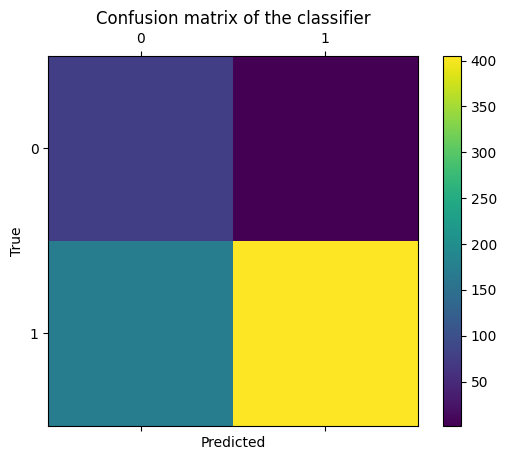

MODEL - gnb

**** RESULTS ****

F-score: 97.7586%

Mean: 94.9290%
Standard Deviation: 0.007261

[[ 63  16]
 [ 10 567]]

Accuracy: 96.0366%


**** CONFUSION MATRIX ****



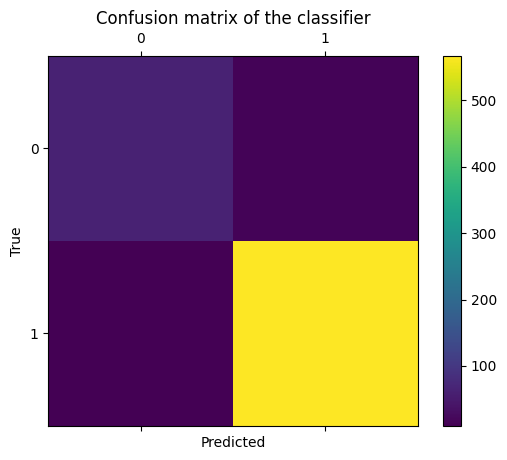

MODEL - svm1

**** RESULTS ****

F-score: 98.1132%

Mean: 94.8148%
Standard Deviation: 0.009841

[[ 62  17]
 [  5 572]]

Accuracy: 96.6463%


**** CONFUSION MATRIX ****



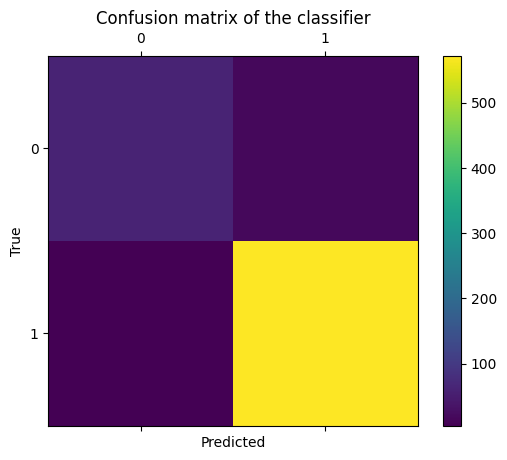

MODEL - svm2

**** RESULTS ****

F-score: 98.4536%

Mean: 95.0057%
Standard Deviation: 0.008257

[[ 65  14]
 [  4 573]]

Accuracy: 97.2561%


**** CONFUSION MATRIX ****



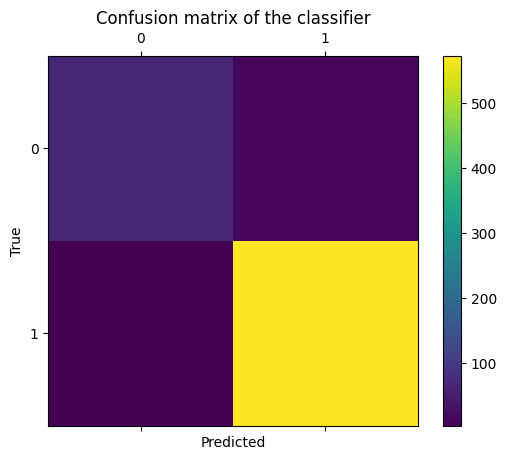

MODEL - svm3

**** RESULTS ****

F-score: 96.1106%

Mean: 93.1364%
Standard Deviation: 0.01176

[[ 55  24]
 [ 21 556]]

Accuracy: 93.1402%


**** CONFUSION MATRIX ****



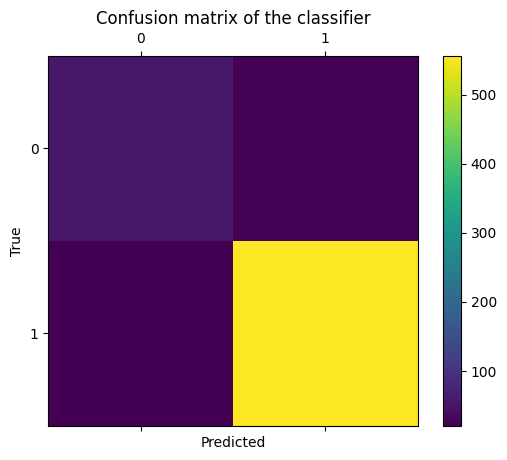

MODEL - mlp1

**** RESULTS ****

F-score: 98.9601%

Mean: 96.5689%
Standard Deviation: 0.0059

[[ 73   6]
 [  6 571]]

Accuracy: 98.1707%


**** CONFUSION MATRIX ****



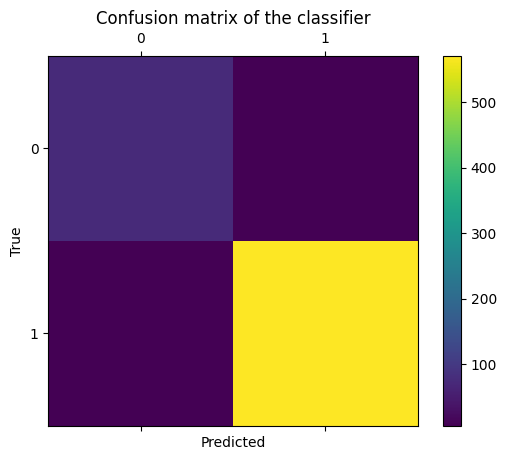

MODEL - mlp2

**** RESULTS ****

F-score: 99.0476%



/home/anonymous/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anonymous/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anonymous/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean: 96.7213%
Standard Deviation: 0.005707

[[ 73   6]
 [  5 572]]

Accuracy: 98.3232%


**** CONFUSION MATRIX ****



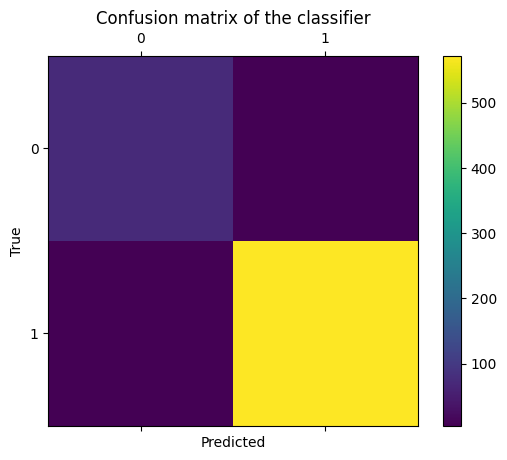

MODEL - ada

**** RESULTS ****

F-score: 97.7021%

Mean: 95.7680%
Standard Deviation: 0.004004

[[ 55  24]
 [  3 574]]

Accuracy: 95.8841%


**** CONFUSION MATRIX ****



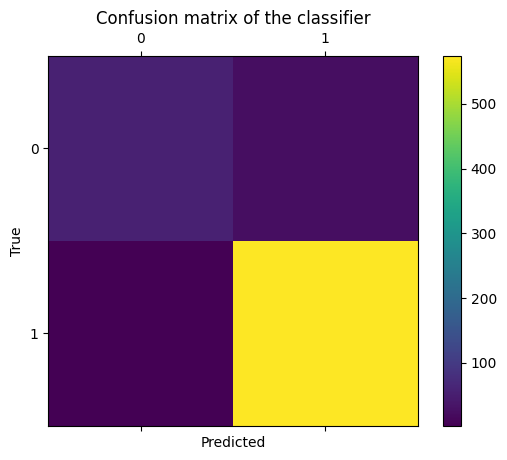

MODEL - dtc

**** RESULTS ****

F-score: 99.6534%

Mean: 95.9974%
Standard Deviation: 0.0082

[[ 77   2]
 [  2 575]]

Accuracy: 99.3902%


**** CONFUSION MATRIX ****



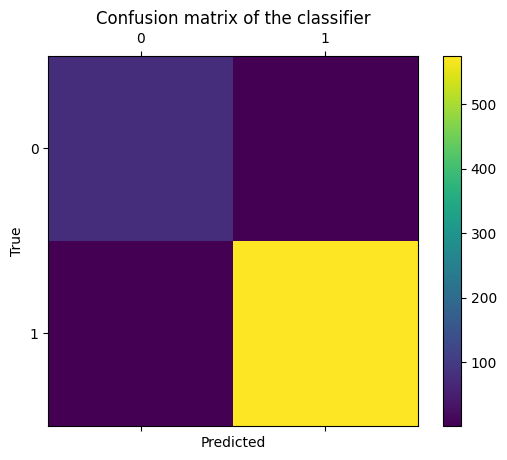

MODEL - rfc

**** RESULTS ****

F-score: 99.6540%

Mean: 97.0650%
Standard Deviation: 0.008681

[[ 76   3]
 [  1 576]]

Accuracy: 99.3902%


**** CONFUSION MATRIX ****



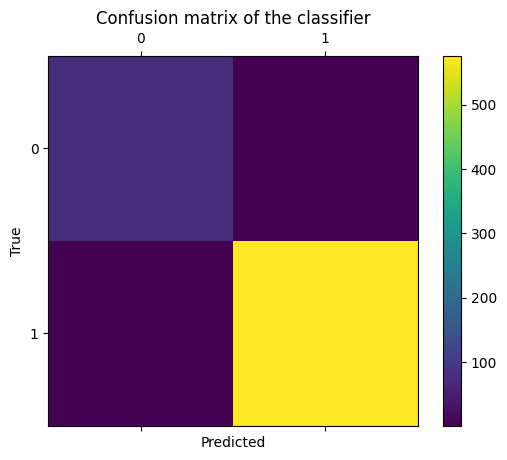

MODEL - gbc

**** RESULTS ****

F-score: 99.1349%

Mean: 97.0648%
Standard Deviation: 0.005099

[[ 73   6]
 [  4 573]]

Accuracy: 98.4756%


**** CONFUSION MATRIX ****



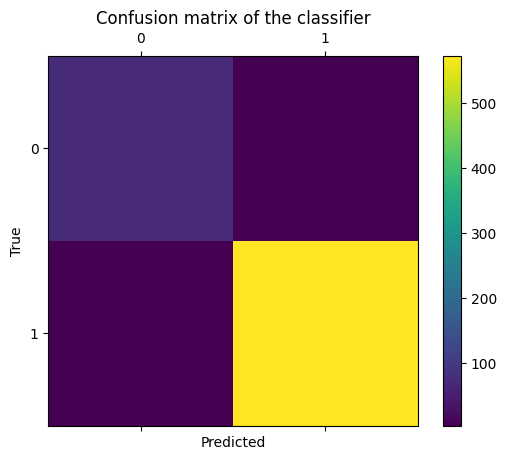

MODEL - lr

**** RESULTS ****

F-score: 98.1067%

Mean: 94.8145%
Standard Deviation: 0.008757

[[ 64  15]
 [  7 570]]

Accuracy: 96.6463%


**** CONFUSION MATRIX ****



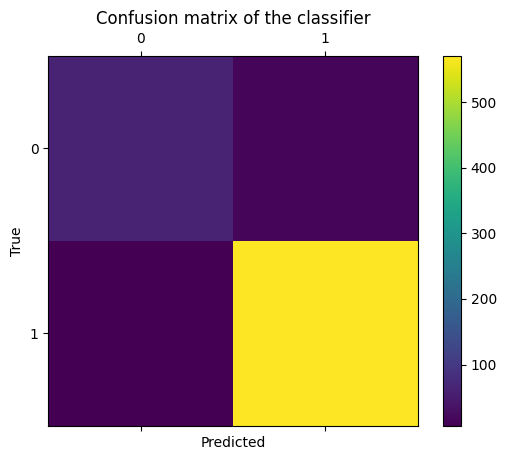

In [18]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(features)

# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# ------------------------------------------------------------------------------
# Multiple Classifiers
# ------------------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt

clfs = {
    'knn': KNeighborsClassifier(5),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

f1_scores = dict()
for clf_name in clfs:
    print("=" * 30)
    print("MODEL -", clf_name)
    print("=" * 30)
    clf = clfs[clf_name]
    clf.fit(X, y)

    print("")
    print('**** RESULTS ****')
    print("")
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_test, y_pred)
    print("F-score: {:.4%}".format(f1_scores[clf_name]))
    print("")
    # K-Fold cross validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
    print("Mean: {:.4%}".format(accuracies.mean()))
    print("Standard Deviation: {:.4}".format(accuracies.std()))
    print("")

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("")
    accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
    print("Accuracy: {:.4%}".format(accuracy))
    print("")

    print("")
    print('**** CONFUSION MATRIX ****')
    print("")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()